In [1]:
from utils.load_data import gift_data_to_df
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### GiftEval Benchmark

In [2]:
short_datasets = "solar/10T solar/H solar/D solar/W jena_weather/10T jena_weather/H jena_weather/D " \
"bitbrains_fast_storage/5T bitbrains_fast_storage/H bitbrains_rnd/5T bitbrains_rnd/H bizitobs_application " \
"bizitobs_service bizitobs_l2c/5T bizitobs_l2c/H"

med_long_datasets = "solar/10T solar/H jena_weather/10T jena_weather/H " \
"bitbrains_fast_storage/5T bitbrains_rnd/5T bizitobs_application bizitobs_service bizitobs_l2c/5T bizitobs_l2c/H"

# Get union of short and med_long datasets
all_datasets = list(set(short_datasets.split() + med_long_datasets.split()))

dataset_properties_map = json.load(open("data/dataset_properties.json"))

In [3]:
len(all_datasets)

15

In [4]:
df = gift_data_to_df("solar/10T")
df

c:\Documenti\VS_Code\tesi\TSFM-ZeroShotEval\src\gift_eval\data.py:149: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  freq = norm_freq_str(to_offset(self.freq).name)
c:\Users\giuli\anaconda3\lib\site-packages\gluonts\dataset\common.py:263: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  return pd.Period(val, freq)


,item_id,start,freq,target,set
0,item_0,2006-01-01 00:00,10T,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",test
1,item_0,2006-12-25 08:00,10T,"[16.45, 8.05, 26.5, 27.25, 17.9, 16.45, 21.15,...",test
2,item_0,2006-01-01 00:00,10T,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",test
3,item_0,2006-12-25 16:00,10T,"[9.1, 3.95, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",test
4,item_0,2006-01-01 00:00,10T,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",test
...,...,...,...,...,...
5475,item_136,2006-12-31 00:00,10T,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",test
5476,item_136,2006-01-01 00:00,10T,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",test
5477,item_136,2006-12-31 08:00,10T,"[9.05, 9.05, 11.0, 14.2, 15.9, 15.65, 18.5, 21...",test
5478,item_136,2006-01-01 00:00,10T,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",test


In [5]:
df["target"][0].shape

(51600,)

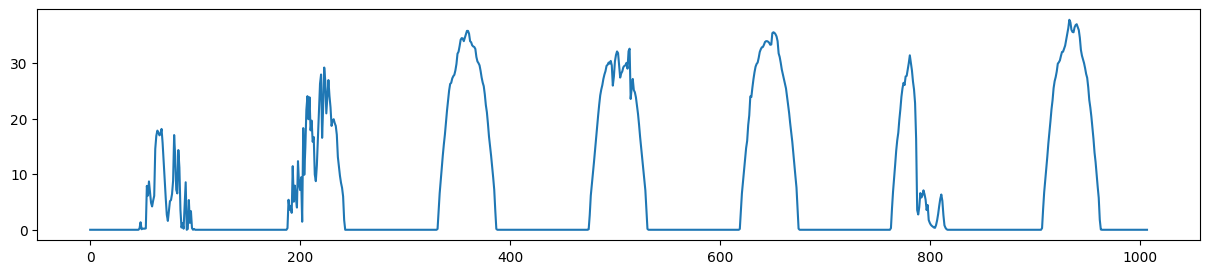

In [6]:
plt.figure(figsize=(15,3))
plt.plot(df["target"][5000][:6*24*7]);

In [7]:
dfH = gift_data_to_df("solar/H")

c:\Documenti\VS_Code\tesi\TSFM-ZeroShotEval\src\gift_eval\data.py:149: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  freq = norm_freq_str(to_offset(self.freq).name)
c:\Users\giuli\anaconda3\lib\site-packages\gluonts\dataset\common.py:263: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  return pd.Period(val, freq)


In [9]:
dfH

,item_id,start,freq,target,set
0,item_0,2006-01-01 00:00,H,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9, 32.15...",test
1,item_0,2006-11-24 00:00,H,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.8, 145.25, 21...",test
2,item_0,2006-01-01 00:00,H,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9, 32.15...",test
3,item_0,2006-11-26 00:00,H,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 136.45, 21...",test
4,item_0,2006-01-01 00:00,H,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9, 32.15...",test
...,...,...,...,...,...
5201,item_136,2006-12-26 00:00,H,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.95, 29.0...",test
5202,item_136,2006-01-01 00:00,H,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.25, 59....",test
5203,item_136,2006-12-28 00:00,H,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.15, 115...",test
5204,item_136,2006-01-01 00:00,H,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.25, 59....",test


In [10]:
a = [6*i for i in range(0, 1000)]
dfH["target"][0][:1000] == df["target"][0][a]

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,